<a href="https://colab.research.google.com/github/bringol/IA_TP_GRUPO_2/blob/dev/Dataset_no_me_comas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Yellow Submarine
----

Cada fila representa un hongo, cada columna contiene atributos de este.

La columna *classes* indica si el hongo es venenoso o no.

hongos | atributos
:----:   | :----:
8124     | 23


# Variables

Nombre   |  Posibles valores
:------- |  :---
cap-shape   | (bell, conical, convex, flat, knobbed, sunken)
cap-surface | (fibrous, grooves, scaly, smooth)
cap-color | (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow)
bruises | (bruises, no)
odor | (almond, anise, creosote, fishy, foul, musty, none, pungent, spicy)
gill-attachment | (attached, descending, free, notched)
gill-spacing | (close, crowded, distant)
gill-size | (broad, narrow)
gill-color | (black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, yellow)
stalk-shape | (enlarging, tapering)
stalk-root | (bulbous, club, cup, equal, rhizomorphs, rooted, missing)
stalk-surface-above-ring | (fibrous, scaly, silky, smooth)
stalk-surface-below-ring | (fibrous, scaly, silky, smooth)
stalk-color-above-ring | (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
stalk-color-below-ring | (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
veil-type | (partial, universal)
veil-color | (brown, orange, white, yellow)
ring-number | (none, one, two)
ring-type | (cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone)
spore-print-color | (black, brown, buff, chocolate, green, orange, purple, white, yellow)
population | (abundant, clustered, numerous, scattered ,several, solitary)
habitat | (grasses, leaves, meadows, paths, urban, waste, woods)
classes   |  (edible, poisonous)

In [ ]:
#@title Instalación Optuna
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00


In [1]:
#@title Librerías y Cargado de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import seaborn as sns
#import optuna #sacar
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



# Cargar los datos
mushroom_data = pd.read_csv('Yellow_Submarine.csv')

In [ ]:
mushroom_data.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#@title Verificar valores faltantes
missing_values = mushroom_data.isnull().sum()
print("Valores faltantes en cada columna:")
print(missing_values)

Valores faltantes en cada columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [2]:
#@title Convertir todas las categorías a minúsculas
for col in mushroom_data.select_dtypes(include=['object']).columns:
    mushroom_data[col] = mushroom_data[col].str.lower()

In [3]:
#@title Remover la columna 'veil-type' y 'stalk-shape'
mushroom_data.drop(columns=['veil-type','stalk-shape'], inplace=True)

In [ ]:
#@title Cheqeuar la distribución de clases
class_distribution = mushroom_data['class'].value_counts()
print(class_distribution)

class
edible     4208
poisson    3916
Name: count, dtype: int64


In [4]:
#@title Cambiar "poisson" por "poisonous"
# Original
print(mushroom_data['class'].value_counts())

# Cambiar el nombre 'poisson' a 'poisonous' en la columna 'class'
mushroom_data['class'] = mushroom_data['class'].replace({'poisson': 'poisonous'})

# Verificar que el cambio se haya realizado
print(mushroom_data['class'].value_counts())

class
edible     4208
poisson    3916
Name: count, dtype: int64
class
edible       4208
poisonous    3916
Name: count, dtype: int64


In [ ]:
#@title Verificación de cambios
# Lista de columnas a verificar
columns_to_check = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population',
    'habitat'
]

# Verificar la distribución de "edible" y "poisonous" para cada categoría en cada columna
for column in columns_to_check:
    print(f"Distribución de 'class' para cada valor en '{column}':")
    distribution = mushroom_data.groupby([column, 'class']).size().unstack(fill_value=0)
    print(distribution)
    print("\n")

Distribución de 'class' para cada valor en 'cap-shape':
class      edible  poisonous
cap-shape                   
bell          404         48
conical         0          4
convex       1948       1708
flat         1596       1556
knobbed       228        600
sunken         32          0


Distribución de 'class' para cada valor en 'cap-surface':
class        edible  poisonous
cap-surface                   
fibrous        1560        760
grooves           0          4
scaly          1504       1740
smooth         1144       1412


Distribución de 'class' para cada valor en 'cap-color':
class      edible  poisonous
cap-color                   
brown        1264       1020
buff           48        120
cinnamon       32         12
gray         1032        808
green          16          0
pink           56         88
purple         16          0
red           624        876
white         720        320
yellow        400        672


Distribución de 'class' para cada valor en 'bruises':
clas

#Borrar datos que no aportan valor
cap-shape->
    convex;flat

cap-surface->
    scaly;smooth

cap-color->
    brown;red;yellow

gill-attachment->
    free

gill-color->
    chocolate;gray;pink

gill-attachment->
    close

stalk-root->
    bulbous

stalk-color-below-ring->
    white

veil-color->
    white

ring-number->
    one

ring-type->
    evanescent

habitat->
    woods



In [ ]:
#@title Reemplazar los valores especificados con NaN
values_to_replace = {
    'cap-shape': ['convex', 'flat'],
    'cap-surface': ['scaly', 'smooth'],
    'cap-color': ['brown', 'red', 'yellow'],
    'gill-attachment': ['free'],
    'gill-color': ['chocolate', 'gray', 'pink'],
    'gill-spacing': ['close'],
    'stalk-root': ['bulbous'],
    'stalk-color-below-ring': ['white'],
    'veil-color': ['white'],
    'ring-number': ['one'],
    'ring-type': ['evanescent'],
    'habitat': ['woods']
}

for column, values in values_to_replace.items():
    mushroom_data[column] = mushroom_data[column].replace(values, np.nan)

# Verificar el resultado
print(mushroom_data.head())

# Verificar el número de valores nulos
missing_values = mushroom_data.isnull().sum()
print("Valores faltantes en cada columna después de la sustitución:")
print(missing_values)

       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous       NaN         NaN       NaN  bruises  pungent   
1     edible       NaN         NaN       NaN  bruises   almond   
2     edible      bell         NaN     white  bruises    anise   
3  poisonous       NaN         NaN     white  bruises  pungent   
4     edible       NaN         NaN      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0             NaN          NaN    narrow      black  ...   
1             NaN          NaN     broad      black  ...   
2             NaN          NaN     broad      brown  ...   
3             NaN          NaN    narrow      brown  ...   
4             NaN      crowded     broad      black  ...   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                   smooth                   smooth                  white   
1                   smooth                   smooth                  white   
2       

In [ ]:
#@title Gráfico de Barras
# Datos proporcionados
data_ambiguas = {
    'Feature': ['cap-shape', 'cap-shape', 'cap-surface', 'cap-surface', 'cap-color', 'cap-color', 'cap-color', 'gill-attachment', 'gill-color', 'gill-color', 'gill-color', 'gill-spacing', 'stalk-root', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'habitat'],
    'Value': ['convex', 'flat', 'scaly', 'smooth', 'brown', 'red', 'yellow', 'free', 'chocolate', 'gray', 'pink', 'close', 'bulbous', 'white', 'white', 'one', 'evanescent', 'woods'],
    'Edible': [1948, 1596, 1504, 1144, 1264, 624, 400, 4016, 204, 248, 852, 3008, 1920, 2704, 4016, 3680, 1008, 1880],
    'Poisonous': [1708, 1556, 1740, 1412, 1020, 876, 672, 3898, 528, 504, 640, 3804, 1856, 1680, 3908, 3808, 1768, 1268]
}

df_ambiguas = pd.DataFrame(data_ambiguas)

# Ordenar los datos
df_ambiguas['Total'] = df_ambiguas['Edible'] + df_ambiguas['Poisonous']
df_ambiguas = df_ambiguas.sort_values(by='Total', ascending=False)

# Graficar los datos
fig, ax = plt.subplots(figsize=(16, 10))
bar_width = 0.35
index = np.arange(len(df_ambiguas))

bar1 = ax.bar(index, df_ambiguas['Edible'], bar_width, label='Comestible')
bar2 = ax.bar(index + bar_width, df_ambiguas['Poisonous'], bar_width, label='Venenoso')

ax.set_xlabel('Características')
ax.set_ylabel('Muestras')
ax.set_title('Distribución de Hongos Comestibles y Venenosos según su Característica')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_ambiguas['Feature'] + " - " + df_ambiguas['Value'], rotation=90)
ax.legend()

# Agregar porcentajes sobre las barras
for i in range(len(df_ambiguas)):
    total = df_ambiguas['Total'].iloc[i]
    edible = df_ambiguas['Edible'].iloc[i]
    poisonous = df_ambiguas['Poisonous'].iloc[i]
    edible_pct = (edible / total) * 100
    poisonous_pct = (poisonous / total) * 100

    ax.text(index[i] - bar_width / 2 + 0.2, edible + 50, f'{edible_pct:.0f}%', ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(index[i] + bar_width / 2 + 0.2, poisonous + 50, f'{poisonous_pct:.0f}%', ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()




In [ ]:
#Grafico de Barras valores con más correlación.

In [ ]:
#@title Chequeo de resutlados
# Lista de columnas a verificar
columns_to_check = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population',
    'habitat'
]

# Verificar la distribución de "edible" y "poisonous" para cada categoría en cada columna
for column in columns_to_check:
    print(f"Distribución de 'class' para cada valor en '{column}':")
    distribution = mushroom_data.groupby([column, 'class']).size().unstack(fill_value=0)
    print(distribution)
    print("\n")

# Cheqeuar la distribución de clases
class_distribution = mushroom_data['class'].value_counts()
print(class_distribution)

In [5]:
#@title Codificar la columna objetivo
label_encoder = LabelEncoder()
mushroom_data_cp=mushroom_data.copy()

#Transorma las categorías de la columna objetivo en valores numéricos
mushroom_data_cp['class'] = label_encoder.fit_transform(mushroom_data['class'])

# Visualizar las primeras filas después de codificar la columna objetivo
print("\nDespués de codificar la columna objetivo:")
print(mushroom_data_cp.head())


Después de codificar la columna objetivo:
   class cap-shape cap-surface cap-color  bruises     odor gill-attachment  \
0      1    convex      smooth     brown  bruises  pungent            free   
1      0    convex      smooth    yellow  bruises   almond            free   
2      0      bell      smooth     white  bruises    anise            free   
3      1    convex       scaly     white  bruises  pungent            free   
4      0    convex      smooth      gray       no     none            free   

  gill-spacing gill-size gill-color  ... stalk-surface-above-ring  \
0        close    narrow      black  ...                   smooth   
1        close     broad      black  ...                   smooth   
2        close     broad      brown  ...                   smooth   
3        close    narrow      brown  ...                   smooth   
4      crowded     broad      black  ...                   smooth   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring 

In [6]:
#@title Aplicar one-hot encoding a las características categóricas
mushroom_data_encoded = pd.get_dummies(mushroom_data_cp, drop_first=True)

# Verificar el resultado
print(mushroom_data_encoded.head())

# Mostrar la cantidad de columnas después de One-Hot Encoding
print("Cantidad de columnas después de One-Hot Encoding:", mushroom_data_encoded.shape[1])


   class  cap-shape_conical  cap-shape_convex  cap-shape_flat  \
0      1              False              True           False   
1      0              False              True           False   
2      0              False             False           False   
3      1              False              True           False   
4      0              False              True           False   

   cap-shape_knobbed  cap-shape_sunken  cap-surface_grooves  \
0              False             False                False   
1              False             False                False   
2              False             False                False   
3              False             False                False   
4              False             False                False   

   cap-surface_scaly  cap-surface_smooth  cap-color_buff  ...  \
0              False                True           False  ...   
1              False                True           False  ...   
2              False               

In [7]:
#@title Revisar la correlación entre las características y la variable objetivo
corr_matrix = mushroom_data_encoded.corr()

#sin one hot encoding
#print(corr_matrix['class_poisonous'].sort_values(ascending=False))

#con one hot encoding
print(corr_matrix['class'].sort_values(ascending=False))




class                              1.000000
odor_foul                          0.623842
stalk-surface-above-ring_silky     0.587658
stalk-surface-below-ring_silky     0.573524
gill-size_narrow                   0.540024
                                     ...   
spore-print-color_brown           -0.416645
stalk-surface-below-ring_smooth   -0.425444
stalk-surface-above-ring_smooth   -0.491314
ring-type_pendant                 -0.540469
odor_none                         -0.785557
Name: class, Length: 95, dtype: float64


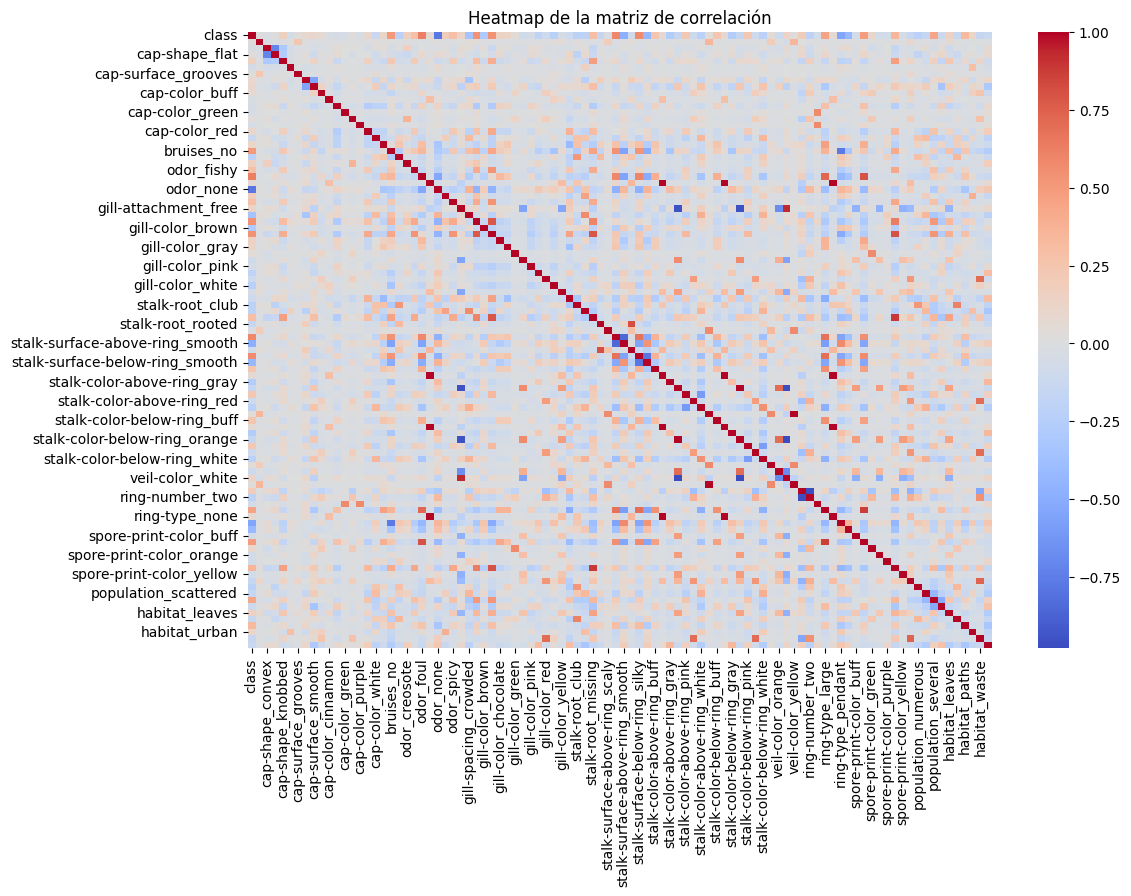

In [ ]:
#@title Visualización de la Matriz de Correlación Completa
# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Heatmap de la matriz de correlación')
plt.show()


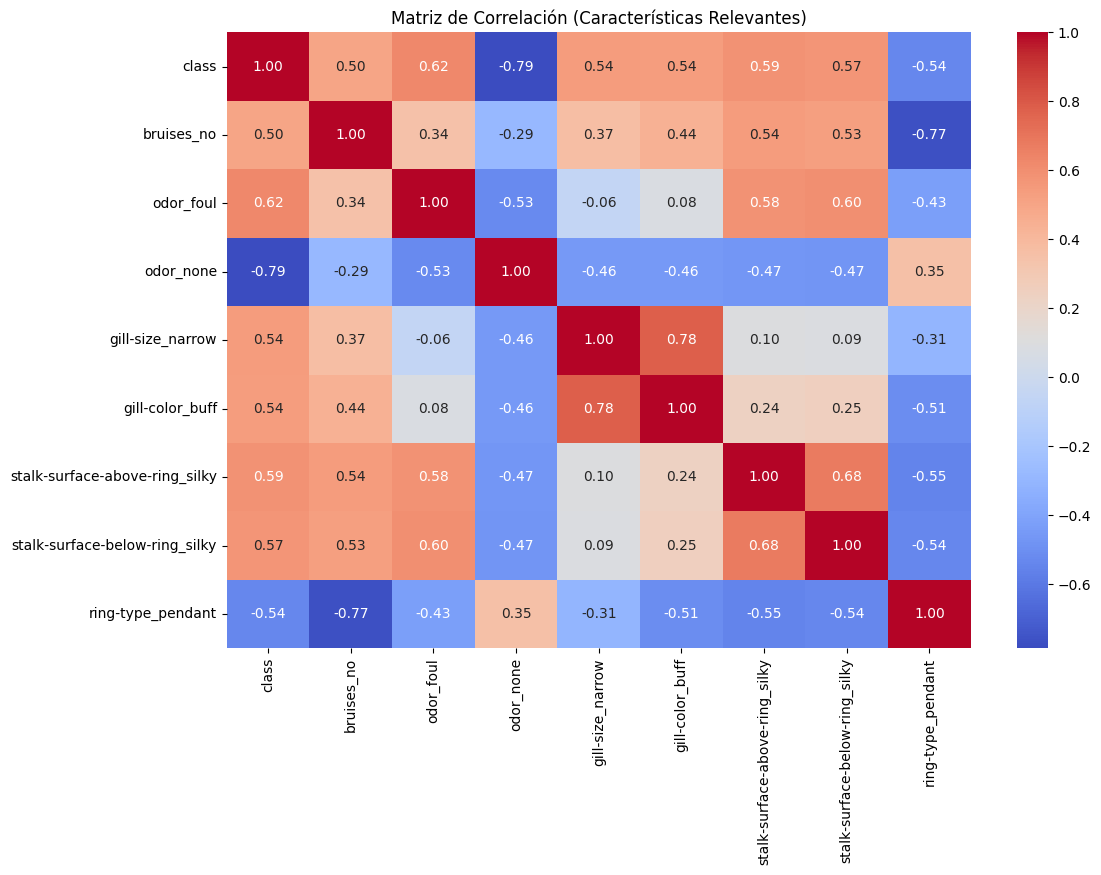

In [24]:
#@title Visualización de la Matriz de Correlación Acotada
# Filtrar características con correlación absoluta mayor a 0.5 con la variable objetivo
corr_target = corr_matrix['class'].abs()
relevant_features = corr_target[corr_target > 0.5].index

# Crear una nueva matriz de correlación solo con las características relevantes
filtered_corr_matrix = mushroom_data_encoded[relevant_features].corr()

# Graficar la nueva matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación (Características Relevantes)')
plt.show()

In [8]:
#@title Selección de Características


#Caso 1: Seleccionar las características más correlacionadas con la clase 'poisonous'
selected_features = corr_matrix['class'].sort_values(ascending=False).index[1:7].tolist()
print("Caso 1: Características más Correlaciondas")
print(corr_matrix['class'].sort_values(ascending=False).index[1:6])


# Caso 2: Seleccionar todas las características (da 100% en los modelos)
#selected_features = mushroom_data_encoded.columns.drop('class').tolist()




Caso 1: Características más Correlaciondas
Index(['odor_foul', 'stalk-surface-above-ring_silky',
       'stalk-surface-below-ring_silky', 'gill-size_narrow',
       'gill-color_buff'],
      dtype='object')


In [ ]:
#@title Caso 3 Seleccionar las características manualmente (más correlacionadas con la clase 'poisonous')
#Ver errores
# Codificar todas las columnas categóricas en el DataFrame
label_encoders = {}
for column in mushroom_data_encoded.columns:
    if mushroom_data_encoded[column].dtype == 'object':
        le = LabelEncoder()
        mushroom_data_encoded[column] = le.fit_transform(mushroom_data_encoded[column])
        label_encoders[column] = le

# Seleccionar las características más correlacionadas con la clase 'poisonous'
selected_features = [
    'odor',  # 'odor_foul' and 'odor_none' combined into 'odor'
    'stalk-surface-above-ring',  # 'stalk-surface-above-ring_silky' and 'stalk-surface-above-ring_smooth' combined into 'stalk-surface-above-ring'
    'stalk-surface-below-ring',  # 'stalk-surface-below-ring_silky' and 'stalk-surface-below-ring_smooth' combined into 'stalk-surface-below-ring'
    'gill-size',  # 'gill-size_narrow' combined into 'gill-size'
    'ring-type',  # 'ring-type_pendant' combined into 'ring-type'
    'spore-print-color'  # 'spore-print-color_brown' combined into 'spore-print-color'
]

In [9]:
#@title Separar las características y la variable objetivo
X = mushroom_data_encoded[selected_features]
y = mushroom_data_encoded['class']

In [ ]:
#@title Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
#@title Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 70% entrenamiento y 30% el resto
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

#El 30% restante en 20% pruebas y 10% validación
# Nota: 20% pruebas es el 2/3 de 30% (lo que resulta en 20%), y 10% validación es el 1/3 de 30%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Verificar las proporciones
print(f"Tamaño de X_train: {len(X_train)}")
print(f"Tamaño de X_test: {len(X_test)}")
print(f"Tamaño de X_val: {len(X_val)}")

Tamaño de X_train: 5686
Tamaño de X_test: 1626
Tamaño de X_val: 812


# **#Modelos que no requieren escalado de características**

In [11]:
#@title Naive Bayes

# No es recomendable escalar las características
# para Naive Bayes Categórico

# Entrenar el modelo de Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())



Precisión del modelo: 0.8985239852398524
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       848
           1       0.93      0.86      0.89       778

    accuracy                           0.90      1626
   macro avg       0.90      0.90      0.90      1626
weighted avg       0.90      0.90      0.90      1626

Precisión del modelo en validación: 0.9039408866995073
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       409
           1       0.95      0.85      0.90       403

    accuracy                           0.90       812
   macro avg       0.91      0.90      0.90       812
weighted avg       0.91      0.90      0.90       812


Parametros Usados
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'min_categories': None}
Precisión del modelo: 0.8985239852398524
Reporte de clasifica

NameError: name 'best_model' is not defined

In [11]:
#@title Random Forest


# No es recomendable escalar las características
# para Random Forest

# Entrenar el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
#print("Precisión F1 Score:", f1_score(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())

Precisión del modelo: 0.9544895448954489
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       848
           1       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95      1626

Precisión del modelo en validación: 0.937192118226601
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       409
           1       0.91      0.97      0.94       403

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812


Parametros Usados
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': N

# **#Modelos que requieren escalado de características**

In [12]:
#@title Escalar las características
# Guardar los nombres de las columnas antes de escalar
feature_names = X_train.columns

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Para validacion
X_val_scaled = scaler.transform(X_val)



In [13]:
#@title Regresion Logística

#EDIT si selecciono todas las carac da 100%
# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val_scaled)
print("Precisión del modelo en el conjunto de validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en el conjunto de validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())


Precisión del modelo: 0.9544895448954489
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       848
           1       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95      1626

Precisión del modelo en el conjunto de validación: 0.937192118226601
Reporte de clasificación en el conjunto de validación:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       409
           1       0.91      0.97      0.94       403

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812


Parametros Usados
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'mul

In [14]:
#@title KNN

# Entrenar el modelo de KNN
model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar n_neighbors según sea necesario
model.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val_scaled)
print("Precisión del modelo en el conjunto de validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en el conjunto de validación:\n", classification_report(y_val, y_val_pred))

Precisión del modelo: 0.942189421894219
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       848
           1       0.94      0.94      0.94       778

    accuracy                           0.94      1626
   macro avg       0.94      0.94      0.94      1626
weighted avg       0.94      0.94      0.94      1626

Precisión del modelo en el conjunto de validación: 0.9421182266009852
Reporte de clasificación en el conjunto de validación:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       409
           1       0.96      0.92      0.94       403

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812



#Optimización mediante RandomizedSearchCV

In [17]:
#@title OPTIMIZACION: Random Forest

param_distribs = {
        'n_estimators': randint(low=50, high=500),
        'max_depth': randint(low=8, high=50),
        'min_samples_split':randint(low=2, high=10),
        'min_samples_leaf': randint(low=1, high=4)
    }

rnd_clf = RandomForestClassifier(n_jobs=-1)

# train across 2 folds, that's a total of 5*2=10 rounds of training
rnd_search = RandomizedSearchCV(rnd_clf, param_distributions=param_distribs,
                                n_iter=4, cv=30, scoring='accuracy')

rnd_search.fit(X_train, y_train)

#Almacenar los resultados en variables para posterior analisis
best_params_rf = rnd_search.best_params_
best_score_rf = rnd_search.best_score_
best_estimator_rf = rnd_search.best_estimator_



In [19]:
#@title OPTIMIZACION: CategoricalNB
# Parameters to tune for CategoricalNB are different from RandomForest
param_distribs = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Smoothing parameter
    #'fit_prior': [True, False]       # Whether to learn class prior probabilities
}

# Initialize CategoricalNB model
cat_nb = CategoricalNB()

# Perform Randomized Search
rnd_search = RandomizedSearchCV(cat_nb, param_distributions=param_distribs,
                                n_iter=4, cv=5, scoring='accuracy',
                                random_state=42, n_jobs=-1)

# Fit the model (assuming you have X_train and y_train)
rnd_search.fit(X_train, y_train)

#Almacenar los resultados en variables para posterior analisis
best_params_nb = rnd_search.best_params_
best_score_nb = rnd_search.best_score_
best_estimator_nb = rnd_search.best_estimator_

In [24]:
#@title OPTIMIZACION: KNN

# Parameters to tune for KNeighborsClassifier
param_distribs = {
    'n_neighbors': randint(low=3, high=31),  # Number of neighbors
    'weights': ['uniform', 'distance'],      # Weighting scheme
    'p': [1, 2]                             # Power parameter for Minkowski distance
}

# Initialize KNeighborsClassifier model
knn = KNeighborsClassifier()

# Perform Randomized Search
rnd_search = RandomizedSearchCV(knn, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy',
                                random_state=42, n_jobs=-1)

# Fit the model (assuming you have X_train and y_train)
rnd_search.fit(X_train_scaled, y_train)

#Almacenar los resultados en variables para posterior analisis
best_params_knn = rnd_search.best_params_
best_score_knn = rnd_search.best_score_
best_estimator_knn = rnd_search.best_estimator_

In [29]:
#@title OPTIMIZACION: Reg Log

from scipy.stats import uniform
# Parameters to tune for Logistic Regression
param_distribs = {
    'C': uniform(loc=0.01, scale=99.99),  # Distribución uniforme entre 0.01 y 100
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
    }

# Initialize LogisticRegression model
logreg = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
# Note: 'saga' solver supports both l1 and l2 penalties

# Perform Randomized Search
rnd_search = RandomizedSearchCV(logreg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy',
                                random_state=42, n_jobs=-1)

# Fit the model (assuming you have X_train and y_train)
rnd_search.fit(X_train_scaled, y_train)

#Almacenar los resultados en variables para posterior analisis
best_params_reg = rnd_search.best_params_
best_score_reg = rnd_search.best_score_
best_estimator_reg = rnd_search.best_estimator_

In [30]:
#@title Acceso a los resultados

#Revisar cómo comprar los resultados usando los sets de testeo
#Nota, usando más cv se mejoraba marginalmente la tercver 93
print("Random Forest - Resultados de Optimización:")
print(best_params_rf)
print("Random Forest - Accuracy:")
print(best_score_rf)
print("Random Forest - Mejores hiperparámetros:")
print(best_estimator_rf)

print("")
print("CategoricalNB - Resultados de Optimización:")
print(best_params_nb)
print("CategoricalNB - Accuracy:")
print(best_score_nb)
print("CategoricalNB - Mejor hiperparámetros:")
print(best_estimator_nb)

print("")
print("KNN - Resultados de Optimización:")
print(best_params_knn)
print("KNN - Accuracy:")
print(best_score_knn)
print("KNN - Mejor hiperparámetros:")
print(best_estimator_knn)

print("")
print("Reg Log - Resultados de Optimización:")
print(best_params_reg)
print("Reg Log - Accuracy:")
print(best_score_reg)
print("Reg Log - Mejor hiperparámetros:")
print(best_estimator_reg)


Random Forest - Resultados de Optimización:
{'max_depth': 45, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 317}
Random Forest - Accuracy:
0.9523428942727189
Random Forest - Mejores hiperparámetros:
RandomForestClassifier(max_depth=45, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=317, n_jobs=-1)

CategoricalNB - Resultados de Optimización:
{'alpha': 10.0}
CategoricalNB - Accuracy:
0.9104806686111665
CategoricalNB - Mejor hiperparámetros:
CategoricalNB(alpha=10.0)

KNN - Resultados de Optimización:
{'n_neighbors': 23, 'p': 1, 'weights': 'distance'}
KNN - Accuracy:
0.9516338899425459
KNN - Mejor hiperparámetros:
KNeighborsClassifier(n_neighbors=23, p=1, weights='distance')

Reg Log - Resultados de Optimización:
{'C': 37.46026648354777, 'penalty': 'l1', 'solver': 'liblinear'}
Reg Log - Accuracy:
0.949171269010268
Reg Log - Mejor hiperparámetros:
LogisticRegression(C=37.46026648354777, max_iter=1000, penalty='l1',
                   random_s

#Optimización Usando GridSearchCV

In [31]:
#@title Naive Bayes con GridSearchCV y y Stratified Cross-Validation

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

# No es recomendable escalar las características
# para Naive Bayes Categórico

# Parámetros a ajustar
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Smoothing parameter
}

# Inicializar CategoricalNB
cat_nb = CategoricalNB()

# Inicializar GridSearchCV con validación cruzada estratificada
grid_search = GridSearchCV(cat_nb, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)

# Evaluar el mejor modelo en el conjunto de prueba (si tienes uno separado)
y_pred = best_model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = best_model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

Mejores parámetros: {'alpha': 0.01}
Precisión del modelo: 0.8985239852398524
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       848
           1       0.93      0.86      0.89       778

    accuracy                           0.90      1626
   macro avg       0.90      0.90      0.90      1626
weighted avg       0.90      0.90      0.90      1626

Precisión del modelo en validación: 0.9039408866995073
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       409
           1       0.95      0.85      0.90       403

    accuracy                           0.90       812
   macro avg       0.91      0.90      0.90       812
weighted avg       0.91      0.90      0.90       812



In [ ]:
#@title Random Forest con GridSearchCV y Stratified Cross-Validation

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Parámetros a ajustar para RandomForest
param_grid = {
    'n_estimators': [50, 100, 200, 250, 300, 350, 400, 450, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV con validación cruzada estratificada
grid_search = GridSearchCV(rf_classifier, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = best_model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Precisión del modelo: 0.9544895448954489
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       848
           1       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95      1626

Precisión del modelo en validación: 0.940923076923077
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       841
           1       0.91      0.97      0.94       784

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [35]:
#@title KNN con GridSearchCV y Stratified Cross-Validation

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Parámetros a ajustar para KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Inicializar KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Inicializar StratifiedKFold para validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar GridSearchCV con StratifiedKFold
grid_search = GridSearchCV(knn_classifier, param_grid, cv=skf,
                           scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento escalados
grid_search.fit(X_train_scaled, y_train)  # Usar X_train_scaled

# Obtener los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)

# Evaluar el mejor modelo en el conjunto de prueba (asumiendo que X_test_scaled también está disponible)
y_pred = best_model.predict(X_test_scaled)  # Usar X_test_scaled
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = best_model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

Mejores parámetros: {'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}
Precisión del modelo: 0.9526445264452644
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       848
           1       0.97      0.93      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626

Precisión del modelo en validación: 0.9433497536945813
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       409
           1       0.97      0.91      0.94       403

    accuracy                           0.94       812
   macro avg       0.95      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812



In [34]:
#@title Regresión Logística con GridSearchCV y Stratified Cross-Validation

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Parámetros a ajustar para Regresión Logística
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  # Solvers que soportan ambas penalizaciones
}

# Inicializar LogisticRegression
logreg_classifier = LogisticRegression(random_state=42, max_iter=1000)  # Aumentar max_iter si es necesario

# Inicializar StratifiedKFold para validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar GridSearchCV con StratifiedKFold
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=skf,
                           scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento escalados
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)

# Evaluar el mejor modelo en el conjunto de prueba (usando X_test escalado)
y_pred = best_model.predict(X_test_scaled)

# Crear un DataFrame con los resultados de la predicción
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'])

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = best_model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

Mejores parámetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Precisión del modelo: 0.9544895448954489
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       848
           1       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95      1626

Precisión del modelo en validación: 0.937192118226601
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       409
           1       0.91      0.97      0.94       403

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812



# **Entrenamiento Usando Hiperparámetros Optimizados**

In [ ]:
#@title Random Forest


# No es recomendable escalar las características
# para Random Forest

best_params = {'n_estimators': 409, 'max_depth': 13} # Replace with your actual best parameters

# Entrenar el modelo de Random Forest
# Create Random Forest model with the best parameters
model_rfc = RandomForestClassifier(random_state=42, **best_params)
# **best_params unpacks the dictionary and passes the key-value pairs as arguments


model_rfc.fit(X_train, y_train)


# Hacer predicciones y evaluar el modelo
y_pred = model_rfc.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model_rfc.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model_rfc.get_params())

Precisión del modelo: 0.9544895448954489
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       848
           1       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95      1626

Precisión del modelo en validación: 0.937192118226601
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       409
           1       0.91      0.97      0.94       403

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812


Parametros Usados
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': Non

# **Validación Cruzada Estratificada: StratifiedKFold**

In [ ]:
#@title Naive Bayes opt vs normal + valid cruz estrat
# Definir los mejores parámetros
best_params = {'alpha': 0.01}  # Reemplaza con los parámetros que hayas optimizado

# Crear el modelo de Naive Bayes
model_nb_opt = CategoricalNB(**best_params)


# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_nb_opt = cross_val_score(model_nb_opt, X_train, y_train, cv=skf, scoring='accuracy')

print("Puntuaciones de validación cruzada:", cv_scores_nb_opt)
print("Precisión media de validación cruzada:", cv_scores_nb_opt.mean())

# Entrenar el modelo con el conjunto de entrenamiento completo
model_nb_opt.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo en el conjunto de prueba
y_pred_opt = model_nb_opt.predict(X_test)
print("Precisión del modelo Optimizado:", accuracy_score(y_test, y_pred_opt))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_opt))

# Evaluar el modelo en el conjunto de validación
y_val_pred_opt = model_nb_opt.predict(X_val)
print("Precisión del modelo optimizado en validación:", accuracy_score(y_val, y_val_pred_opt))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred_opt))

print("")
print(model_nb_opt.get_params())
print("")


print("***************************SIN OPTIMIZAR***************************")
# Crear el modelo de Naive Bayes
model_nb = CategoricalNB()


# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_nb = cross_val_score(model_nb, X_train, y_train, cv=skf, scoring='accuracy')

print("Puntuaciones de validación cruzada:", cv_scores_nb)
print("Precisión media de validación cruzada:", cv_scores_nb.mean())

# Entrenar el modelo con el conjunto de entrenamiento completo
model_nb.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo en el conjunto de prueba
y_pred = model_nb.predict(X_test)
print("Precisión del modelo Optimizado:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model_nb.predict(X_val)
print("Precisión del modelo optimizado en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print("")
print(model_nb.get_params())


Puntuaciones de validación cruzada: [0.91692308 0.92       0.90923077 0.90923077 0.89384615 0.92
 0.90307692 0.90307692 0.90461538 0.90600924]
Precisión media de validación cruzada: 0.9086009244992296
Precisión del modelo Optimizado: 0.9003690036900369
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       848
           1       0.89      0.90      0.90       778

    accuracy                           0.90      1626
   macro avg       0.90      0.90      0.90      1626
weighted avg       0.90      0.90      0.90      1626

Precisión del modelo optimizado en validación: 0.8966153846153846
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       841
           1       0.88      0.91      0.90       784

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg  

---

# **#PCA**

In [ ]:
#@title Sin usar datos mas relevantes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Cargar el conjunto de datos
mushroom_data = pd.read_csv('Yellow_Submarine.csv')

# Eliminar filas con valores NaN
mushroom_data = mushroom_data.dropna()

# Crear una copia del DataFrame para codificar las características categóricas
mushroom_data_encoded = mushroom_data.copy()

# Codificar todas las columnas categóricas en el DataFrame
label_encoders = {}
for column in mushroom_data_encoded.columns:
    if mushroom_data_encoded[column].dtype == 'object':
        le = LabelEncoder()
        mushroom_data_encoded[column] = le.fit_transform(mushroom_data_encoded[column])
        label_encoders[column] = le

# Revisar la correlación entre las características y la variable objetivo
corr_matrix = mushroom_data_encoded.corr()
print(corr_matrix['class'].sort_values(ascending=False))

# Usar todas las características en lugar de seleccionar un subconjunto específico
X = mushroom_data_encoded.drop(columns=['class'])
y = mushroom_data_encoded['class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


class                       1.000000
gill-size                   0.540024
spore-print-color           0.519438
bruises                     0.501530
population                  0.298686
cap-shape                   0.199488
cap-surface                 0.186806
veil-color                  0.145142
gill-attachment             0.129200
stalk-root                  0.094766
cap-color                   0.058452
habitat                    -0.022363
odor                       -0.086800
stalk-shape                -0.102019
stalk-surface-below-ring   -0.139254
ring-number                -0.214366
stalk-surface-above-ring   -0.215088
stalk-color-below-ring     -0.245231
stalk-color-above-ring     -0.263928
gill-color                 -0.270247
gill-spacing               -0.348387
ring-type                  -0.411771
veil-type                        NaN
Name: class, dtype: float64
Precisión del modelo: 0.9634946677604594
Reporte de clasificación:
               precision    recall  f1-score   support

In [ ]:
#@title Random Forest sin funcionar
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Cargar el conjunto de datos
mushroom_data = pd.read_csv("Yellow_Submarine.csv")

# Crear una copia del DataFrame para codificar las características categóricas
mushroom_data_encoded = mushroom_data.copy()

# Codificar todas las columnas categóricas en el DataFrame
label_encoders = {}
for column in mushroom_data_encoded.columns:
    if mushroom_data_encoded[column].dtype == 'object':
        le = LabelEncoder()
        mushroom_data_encoded[column] = le.fit_transform(mushroom_data_encoded[column])
        label_encoders[column] = le

# Eliminar filas con valores NaN después de la codificación
mushroom_data_encoded = mushroom_data_encoded.dropna()

# Seleccionar las características más correlacionadas con la clase 'poisonous'
selected_features = [
    'odor',  # 'odor_foul' and 'odor_none' combined into 'odor'
    'stalk-surface-above-ring',  # 'stalk-surface-above-ring_silky' and 'stalk-surface-above-ring_smooth' combined into 'stalk-surface-above-ring'
    'stalk-surface-below-ring',  # 'stalk-surface-below-ring_silky' and 'stalk-surface-below-ring_smooth' combined into 'stalk-surface-below-ring'
    'gill-size',  # 'gill-size_narrow' combined into 'gill-size'
    'ring-type',  # 'ring-type_pendant' combined into 'ring-type'
    'spore-print-color'  # 'spore-print-color_brown' combined into 'spore-print-color'
]

# Separar las características y la variable objetivo
X = mushroom_data_encoded[selected_features]
y = mushroom_data_encoded['class']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configuración de validación cruzada estratificada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Búsqueda en cuadrícula para KNN
knn_param_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=cv, scoring='accuracy')
knn_grid_search.fit(X_scaled, y)

print("Mejores hiperparámetros para KNN:", knn_grid_search.best_params_)
y_pred_knn = knn_grid_search.predict(X_scaled)
print("Precisión del modelo KNN:", accuracy_score(y, y_pred_knn))
print("Reporte de clasificación KNN:\n", classification_report(y, y_pred_knn))

# Búsqueda en cuadrícula para Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=cv, scoring='accuracy')
rf_grid_search.fit(X, y)

print("Mejores hiperparámetros para Random Forest:", rf_grid_search.best_params_)
y_pred_rf = rf_grid_search.predict(X)
print("Precisión del modelo Random Forest:", accuracy_score(y, y_pred_rf))
print("Reporte de clasificación Random Forest:\n", classification_report(y, y_pred_rf))


In [ ]:

#@title Mostrar todas las características del conjunto de datos
print("Características del conjunto de datos:")
print(mushroom_data.columns)


In [ ]:
#@title Mostrar todas las características del conjunto de datos y sus valores únicos
print("Características y valores únicos del conjunto de datos:")
for column in mushroom_data.columns:
    unique_values = mushroom_data[column].unique()
    print(f"\n{column}:")
    print(unique_values)


#-------------------------------------------------------------------------------------------------

#Matriz de Correlación

In [ ]:
#@title Calcular la matriz de correlación
corr_matrix = mushroom_data_encoded.corr()

# Filtrar características con correlación absoluta mayor a 0.5 con la variable objetivo
corr_target = corr_matrix['class_poisonous'].abs()
relevant_features = corr_target[corr_target > 0.5].index

# Crear una nueva matriz de correlación solo con las características relevantes
filtered_corr_matrix = mushroom_data_encoded[relevant_features].corr()

# Graficar la nueva matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación (Características Relevantes)')
plt.show()


In [ ]:
# Crear una copia del DataFrame para codificar las características categóricas
mushroom_data_encoded = mushroom_data.copy()

# Codificar todas las columnas categóricas en el DataFrame
label_encoders = {}
for column in mushroom_data_encoded.columns:
    if mushroom_data_encoded[column].dtype == 'object':
        le = LabelEncoder()
        mushroom_data_encoded[column] = le.fit_transform(mushroom_data_encoded[column])
        label_encoders[column] = le

# Revisar la correlación entre las características y la variable objetivo
corr_matrix = mushroom_data_encoded.corr()
print(corr_matrix['class'].sort_values(ascending=False))

class                       1.000000
gill-size                   0.540024
spore-print-color           0.519438
bruises                     0.501530
population                  0.298686
cap-shape                   0.199488
cap-surface                 0.186806
veil-color                  0.145142
gill-attachment             0.129200
stalk-root                  0.094766
cap-color                   0.058452
habitat                    -0.022363
odor                       -0.086800
stalk-surface-below-ring   -0.139254
ring-number                -0.214366
stalk-surface-above-ring   -0.215088
stalk-color-below-ring     -0.245231
stalk-color-above-ring     -0.263928
gill-color                 -0.270247
gill-spacing               -0.348387
ring-type                  -0.411771
Name: class, dtype: float64


In [ ]:
# Crear una copia del DataFrame para trabajar
mushroom_data_encoded = mushroom_data.copy()

# Codificar la columna objetivo
label_encoder = LabelEncoder()
mushroom_data_encoded['class'] = label_encoder.fit_transform(mushroom_data_encoded['class'])

# Separar la columna objetivo antes de aplicar one-hot encoding
y = mushroom_data_encoded['class']
X = mushroom_data_encoded.drop(columns=['class'])

# Aplicar one-hot encoding a las características categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
#@title Reg Log con todas las carac

# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



con one hot encoding en lugar de label encoder

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos
mushroom_data = pd.read_csv("Yellow_Submarine.csv")

# Crear una copia del DataFrame para codificar las características categóricas
mushroom_data_encoded = mushroom_data.copy()

# Codificar la columna objetivo
label_encoder = LabelEncoder()
mushroom_data_encoded['class'] = label_encoder.fit_transform(mushroom_data_encoded['class'])

# Identificar las columnas categóricas
categorical_cols = mushroom_data_encoded.select_dtypes(include=['object']).columns

# Definir el transformador para las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Aplicar el transformador para las columnas categóricas
X_encoded = preprocessor.fit_transform(mushroom_data_encoded)

# Crear un DataFrame con las características codificadas
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=preprocessor.get_feature_names_out())

# Añadir la columna objetivo
X_encoded['class'] = mushroom_data_encoded['class']

# Revisar la correlación entre las características y la variable objetivo
corr_matrix = X_encoded.corr()
print(corr_matrix['class'].sort_values(ascending=False))

# Seleccionar las características más correlacionadas con la clase 'poisonous'
selected_features = corr_matrix['class'].sort_values(ascending=False).index[1:7].tolist()

# Separar las características y la variable objetivo
X = X_encoded[selected_features]
y = X_encoded['class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


class                                  1.000000
cat__odor_foul                         0.623842
cat__stalk-surface-above-ring_silky    0.587658
cat__stalk-surface-below-ring_silky    0.573524
cat__gill-size_narrow                  0.540024
                                         ...   
cat__bruises_bruises                  -0.501530
cat__gill-size_broad                  -0.540024
cat__ring-type_pendant                -0.540469
cat__odor_none                        -0.785557
cat__veil-type_partial                      NaN
Name: class, Length: 118, dtype: float64
Precisión del modelo: 0.9487284659557014
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1257
           1       0.92      0.97      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



#Separación de Características

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = mushroom_data_encoded.drop('class_poisonous', axis=1)
y = mushroom_data_encoded['class_poisonous']

#División de Datos

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba antes de aplicar PCA (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Escalar las características solo en el conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#@title Aplicación de PCA (Análisis de Componentes Principales)
# Aplicar PCA solo en el conjunto de entrenamiento
pca = PCA(n_components=0.95)  # Retener el 95% de la variación
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Verificar la nueva forma de los datos después de PCA
print(f"Forma original de X: {X.shape}")
print(f"Forma de X después de PCA: {X_train_pca.shape}")


'''
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Retener el 95% de la variación
X_pca = pca.fit_transform(X_scaled)

# Verificar la nueva forma de los datos después de PCA
print(f"Forma original de X: {X.shape}")
print(f"Forma de X después de PCA: {X_pca.shape}")

# Imprimir la cantidad de varianza explicada por cada componente principal
print(f"Varianza explicada por cada componente principal: {pca.explained_variance_ratio_}")
print(f"Varianza explicada acumulada: {pca.explained_variance_ratio_.cumsum()}")
'''


Forma original de X: (8124, 76)
Forma de X después de PCA: (5686, 47)


'\n# Escalar las características\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Aplicar PCA\npca = PCA(n_components=0.95)  # Retener el 95% de la variación\nX_pca = pca.fit_transform(X_scaled)\n\n# Verificar la nueva forma de los datos después de PCA\nprint(f"Forma original de X: {X.shape}")\nprint(f"Forma de X después de PCA: {X_pca.shape}")\n\n# Imprimir la cantidad de varianza explicada por cada componente principal\nprint(f"Varianza explicada por cada componente principal: {pca.explained_variance_ratio_}")\nprint(f"Varianza explicada acumulada: {pca.explained_variance_ratio_.cumsum()}")\n'

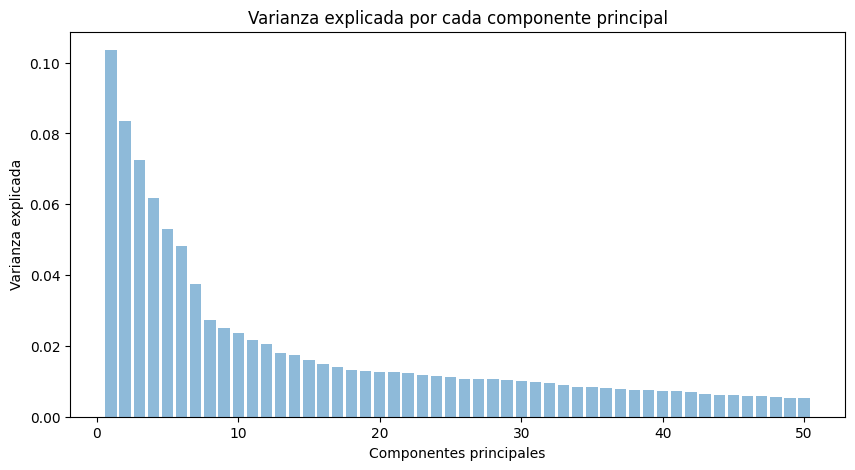

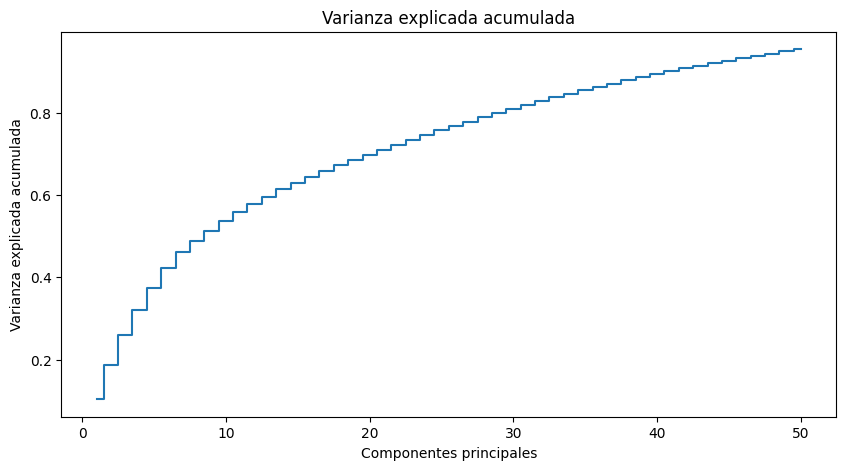

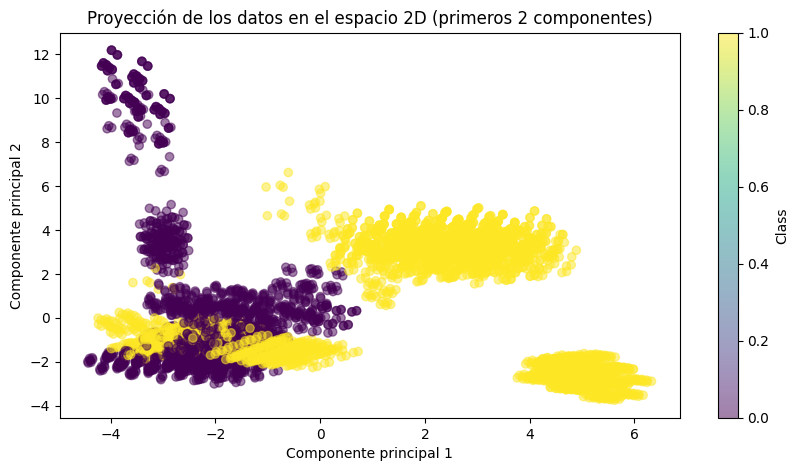

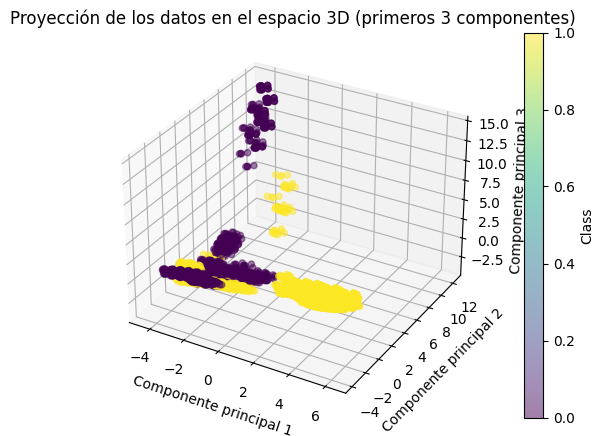

In [ ]:
#@title Grafico PCA
# Gráfico de varianza explicada por cada componente principal
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.show()

# Gráfico de varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where='mid')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada')
plt.show()

# Gráfico de proyección en el espacio 2D
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Proyección de los datos en el espacio 2D (primeros 2 componentes)')
plt.colorbar(label='Class')
plt.show()

# Gráfico en 3D (requiere mpl_toolkits.mplot3d)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', alpha=0.5)
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
ax.set_title('Proyección de los datos en el espacio 3D (primeros 3 componentes)')
fig.colorbar(scatter, ax=ax, label='Class')
plt.show()

#-------------------------------------------------------------

<p align="center">
  <img src="https://i.imgflip.com/2qhd80.jpg?format=250w"/>
</p>


#Cementerio

#Escalado de Características

In [ ]:
#@title Verificación de Distribución de Clases
# Verificar la distribución de clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())

print("Distribución de clases en el primer conjunto de prueba:")
print(y_test1.value_counts())

print("Distribución de clases en el segundo conjunto de prueba adicional:")
print(y_test2.value_counts())


Distribución de clases en el conjunto de entrenamiento:
class_poisonous
False    3365
True     3134
Name: count, dtype: int64
Distribución de clases en el primer conjunto de prueba:
class_poisonous
False    413
True     399
Name: count, dtype: int64
Distribución de clases en el segundo conjunto de prueba adicional:
class_poisonous
False    430
True     383
Name: count, dtype: int64


In [ ]:
#@title [Deprecado] Optimización Random Forest
# Crear un pipeline que incluye el escalado de características y la aplicación de PCA
def create_pipeline(max_depth, min_samples_split, n_estimators):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('clf', RandomForestClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            n_estimators=n_estimators,
            random_state=42))
    ])

# Función de objetivo para optimización bayesiana
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 22)
    min_samples_split = trial.suggest_int('min_samples_split', 10, 200)
    n_estimators = trial.suggest_int('n_estimators', 50, 500)

    pipeline = create_pipeline(max_depth, min_samples_split, n_estimators)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

    return scores.mean()

# Crear un estudio y optimizar los hiperparámetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados por Optuna:")
print(study.best_params)
print(f"Mejor score de validación: {study.best_value:.4f}")

# Visualizar la importancia de los hiperparámetros
optuna.visualization.plot_param_importances(study)
plt.show()

# Visualizar la historia de optimización
optuna.visualization.plot_optimization_history(study)
plt.show()

In [ ]:
#@title [Deprecado] Optimizacion SVM
# Crear un pipeline que incluye el escalado de características y la aplicación de PCA
def create_pipeline_svm(C, kernel, gamma):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('clf', SVC(C=C, kernel=kernel, gamma=gamma, random_state=42))
    ])

# Función de objetivo para optimización bayesiana
def objective_svm(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
    gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)

    pipeline = create_pipeline_svm(C, kernel, gamma)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

    return scores.mean()

# Crear un estudio y optimizar los hiperparámetros
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados por Optuna para SVM:")
print(study_svm.best_params)
print(f"Mejor score de validación para SVM: {study_svm.best_value:.4f}")

# Visualizar la importancia de los hiperparámetros
optuna.visualization.plot_param_importances(study_svm)
plt.title("Importancia de los Hiperparámetros (SVM)")
plt.show()

# Visualizar la historia de optimización
optuna.visualization.plot_optimization_history(study_svm)
plt.title("Historia de Optimización (SVM)")
plt.show()


In [ ]:
#@title [Deprecado] Optimización KNN
# Crear un pipeline que incluye el escalado de características y la aplicación de PCA
def create_pipeline_knn(n_neighbors, p):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('clf', KNeighborsClassifier(n_neighbors=n_neighbors, p=p))
    ])

# Función de objetivo para optimización bayesiana
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    p = trial.suggest_int('p', 1, 2)

    pipeline = create_pipeline_knn(n_neighbors, p)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

    return scores.mean()

# Crear un estudio y optimizar los hiperparámetros
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados por Optuna para KNN:")
print(study_knn.best_params)
print(f"Mejor score de validación para KNN: {study_knn.best_value:.4f}")

# Visualizar la importancia de los hiperparámetros
optuna.visualization.plot_param_importances(study_knn)
plt.title("Importancia de los Hiperparámetros (KNN)")
plt.show()

# Visualizar la historia de optimización
optuna.visualization.plot_optimization_history(study_knn)
plt.title("Historia de Optimización (KNN)")
plt.show()


#Conjunto de prueba

In [ ]:
#@title [Deprecado]  Pruebas adicionales
# Dividir los datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separar una porción del conjunto de prueba para un test adicional (50/50)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Aplicar PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test1_pca = pca.transform(X_test1_scaled)
X_test2_pca = pca.transform(X_test2_scaled)

# Entrenar y evaluar el modelo en el primer conjunto de prueba
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_test1 = knn.predict(X_test1_pca)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)
print(f"Exactitud de KNN en el primer conjunto de prueba: {accuracy_test1:.4f}")
print("Reporte de clasificación de KNN en el primer conjunto de prueba:")
print(classification_report(y_test1, y_pred_test1))
print("Matriz de confusión de KNN en el primer conjunto de prueba:")
print(confusion_matrix(y_test1, y_pred_test1))

# Evaluar el modelo en el segundo conjunto de prueba adicional
y_pred_test2 = knn.predict(X_test2_pca)
accuracy_test2 = accuracy_score(y_test2, y_pred_test2)
print(f"Exactitud de KNN en el segundo conjunto de prueba adicional: {accuracy_test2:.4f}")
print("Reporte de clasificación de KNN en el segundo conjunto de prueba adicional:")
print(classification_report(y_test2, y_pred_test2))
print("Matriz de confusión de KNN en el segundo conjunto de prueba adicional:")
print(confusion_matrix(y_test2, y_pred_test2))


#Entrenamiento y Evaluación de Modelos

 División de Modelos

In [ ]:
#@title [Deprecado] Random Forest Optimizado
# Definir los mejores parámetros encontrados por la optimización bayesiana para Random Forest
best_params_rf = {
    'max_depth': 14,
    'min_samples_split': 55,
    'n_estimators': 416
}

# Crear el modelo Random Forest con los mejores parámetros
rf_model = RandomForestClassifier(
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators']
)

# Entrenar el modelo Random Forest con tus datos de entrenamiento
#rf_model.fit(X_train, y_train)
rf_model.fit(X_train_pca, y_train)
# Hacer predicciones en los datos de prueba
y_pred_rf = rf_model.predict(X_test_pca)

# Calcular y mostrar las métricas
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
#recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f'Random Forest Precision: {precision_rf:.4f}')
print(f'Random Forest Recall: {recall_rf:.4f}')
print(f'Random Forest F1 Score: {f1_rf:.4f}')

Random Forest Precision: 0.9996
Random Forest Recall: 0.9996
Random Forest F1 Score: 0.9996


In [ ]:
#@title [Deprecado] Validación Cruzada Estratificada
# Escalar las características y aplicar PCA dentro de un pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

X_pca = pipeline.fit_transform(X)

# Definir los modelos con los mejores hiperparámetros
models = {
    'Random Forest': RandomForestClassifier(max_depth=14, min_samples_split=55, n_estimators=416, random_state=42),
    'SVM': SVC(C=72.4650505109439, kernel='poly', gamma=0.038527595905536574, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=1, p=2)
}

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir los scorers
scorers = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Realizar validación cruzada estratificada para cada modelo y cada métrica
for model_name, model in models.items():
    print(f"Validación cruzada para {model_name}")
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X_pca, y, cv=cv, scoring=scorer)
        print(f"{metric_name.capitalize()} Scores: {scores}")
        print(f"Promedio {metric_name.capitalize()}: {scores.mean():.4f}")
        print(f"Desviación estándar {metric_name.capitalize()}: {scores.std():.4f}")
    print("\n")

Validación cruzada para Random Forest
Precision Scores: [0.99938535 0.99938535 1.         0.99877215 0.99938497]
Promedio Precision: 0.9994
Desviación estándar Precision: 0.0004
Recall Scores: [0.99938462 0.99938462 1.         0.99876923 0.99938424]
Promedio Recall: 0.9994
Desviación estándar Recall: 0.0004
F1 Scores: [0.9993846  0.9993846  1.         0.99876917 0.99938422]
Promedio F1: 0.9994
Desviación estándar F1: 0.0004


Validación cruzada para SVM
Precision Scores: [1. 1. 1. 1. 1.]
Promedio Precision: 1.0000
Desviación estándar Precision: 0.0000
Recall Scores: [1. 1. 1. 1. 1.]
Promedio Recall: 1.0000
Desviación estándar Recall: 0.0000
F1 Scores: [1. 1. 1. 1. 1.]
Promedio F1: 1.0000
Desviación estándar F1: 0.0000


Validación cruzada para KNN
Precision Scores: [1.         0.99938535 1.         1.         1.        ]
Promedio Precision: 0.9999
Desviación estándar Precision: 0.0002
Recall Scores: [1.         0.99938462 1.         1.         1.        ]
Promedio Recall: 0.9999
Desvia

In [ ]:
#@title KNN sin funcionar
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos
mushroom_data = pd.read_csv("Yellow_Submarine.csv")

# Separar las características y la variable objetivo
X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']

# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Crear un pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Crear un pipeline con el preprocesador y el modelo KNN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo KNN
pipeline.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = pipeline.predict(X_test)

# Mostrar los resultados
print("Precisión del modelo KNN:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


In [ ]:
#@title Aplicando PCA al test
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Cargar el conjunto de datos
#mushroom_data = pd.read_csv("/mnt/data/Yellow_Submarine.csv")

# Crear una copia del DataFrame para codificar las características categóricas
mushroom_data_encoded = mushroom_data.copy()

# Codificar todas las columnas categóricas en el DataFrame
label_encoders = {}
for column in mushroom_data_encoded.columns:
    if mushroom_data_encoded[column].dtype == 'object':
        le = LabelEncoder()
        mushroom_data_encoded[column] = le.fit_transform(mushroom_data_encoded[column])
        label_encoders[column] = le

# Revisar la correlación entre las características y la variable objetivo
corr_matrix = mushroom_data_encoded.corr()
print(corr_matrix['class'].sort_values(ascending=False))

# Seleccionar las características más correlacionadas con la clase 'poisonous'
selected_features = [
    'odor',  # 'odor_foul' and 'odor_none' combined into 'odor'
    'stalk-surface-above-ring',  # 'stalk-surface-above-ring_silky' and 'stalk-surface-above-ring_smooth' combined into 'stalk-surface-above-ring'
    'stalk-surface-below-ring',  # 'stalk-surface-below-ring_silky' and 'stalk-surface-below-ring_smooth' combined into 'stalk-surface-below-ring'
    'gill-size',  # 'gill-size_narrow' combined into 'gill-size'
    'ring-type',  # 'ring-type_pendant' combined into 'ring-type'
    'spore-print-color'  # 'spore-print-color_brown' combined into 'spore-print-color'
]

# Separar las características y la variable objetivo
X = mushroom_data_encoded[selected_features]
y = mushroom_data_encoded['class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_pca, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_pca)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


class                       1.000000
gill-size                   0.540024
spore-print-color           0.519438
bruises                     0.501530
gill-spacing                0.348387
population                  0.298686
cap-surface                 0.194858
ring-number                 0.152261
veil-color                  0.144054
stalk-root                  0.129341
gill-attachment             0.129200
cap-shape                   0.066802
cap-color                   0.038640
gill-color                 -0.019091
habitat                    -0.022363
odor                       -0.086800
stalk-surface-below-ring   -0.139254
ring-type                  -0.208466
stalk-surface-above-ring   -0.215088
stalk-color-below-ring     -0.248676
stalk-color-above-ring     -0.263928
Name: class, dtype: float64
Precisión del modelo: 0.9138638228055783
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      1257
           1      

In [ ]:
#@title Reg Log con Caract Mas correlacionadas
from sklearn.preprocessing import LabelEncoder

# Seleccionar las características más correlacionadas con la clase 'poisonous'
selected_features = [
    'odor',  # 'odor_foul' and 'odor_none' combined into 'odor'
    'stalk-surface-above-ring',  # 'stalk-surface-above-ring_silky' and 'stalk-surface-above-ring_smooth' combined into 'stalk-surface-above-ring'
    'stalk-surface-below-ring',  # 'stalk-surface-below-ring_silky' and 'stalk-surface-below-ring_smooth' combined into 'stalk-surface-below-ring'
    'gill-size',  # 'gill-size_narrow' combined into 'gill-size'
    'ring-type',  # 'ring-type_pendant' combined into 'ring-type'
    'spore-print-color'  # 'spore-print-color_brown' combined into 'spore-print-color'
]

# Separar las características y la variable objetivo
X = mushroom_data_encoded[selected_features]
y = mushroom_data_encoded['class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)

y_val_pred = model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Precisión del modelo en validación: 0.5123152709359606
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.51      0.63      0.56       409
           1       0.51      0.39      0.45       403

    accuracy                           0.51       812
   macro avg       0.51      0.51      0.51       812
weighted avg       0.51      0.51      0.51       812

Precisión del modelo: 0.9138638228055783
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      1257
           1       0.88      0.95      0.91      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438



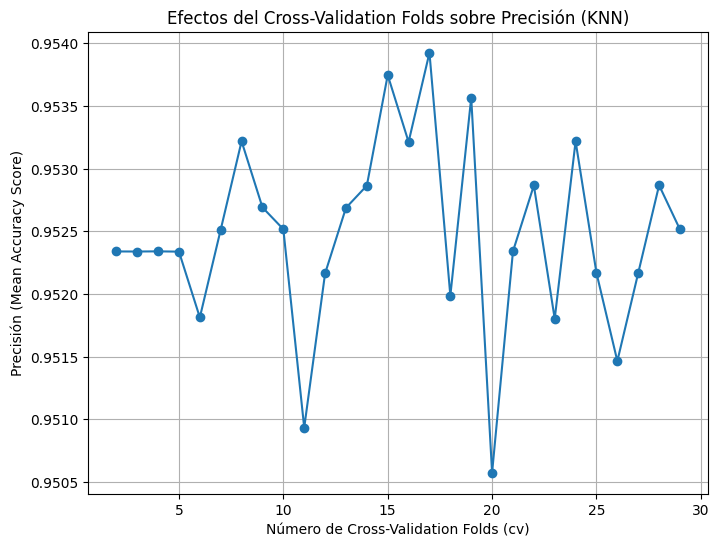

Best parameters for cv=2: {'n_neighbors': 15}
Best parameters for cv=3: {'n_neighbors': 15}
Best parameters for cv=4: {'n_neighbors': 7}
Best parameters for cv=5: {'n_neighbors': 15}
Best parameters for cv=6: {'n_neighbors': 26}
Best parameters for cv=7: {'n_neighbors': 29}
Best parameters for cv=8: {'n_neighbors': 7}
Best parameters for cv=9: {'n_neighbors': 15}
Best parameters for cv=10: {'n_neighbors': 7}
Best parameters for cv=11: {'n_neighbors': 15}
Best parameters for cv=12: {'n_neighbors': 11}
Best parameters for cv=13: {'n_neighbors': 11}
Best parameters for cv=14: {'n_neighbors': 15}
Best parameters for cv=15: {'n_neighbors': 11}
Best parameters for cv=16: {'n_neighbors': 15}
Best parameters for cv=17: {'n_neighbors': 15}
Best parameters for cv=18: {'n_neighbors': 7}
Best parameters for cv=19: {'n_neighbors': 8}
Best parameters for cv=20: {'n_neighbors': 20}
Best parameters for cv=21: {'n_neighbors': 15}
Best parameters for cv=22: {'n_neighbors': 7}
Best parameters for cv=23: 

In [ ]:
#@title OPTIMIZACION2: KNN

# Parameters to tune for KNeighborsClassifier
param_distribs = {
    'n_neighbors': randint(low=1, high=31),  # Number of neighbors
    #'weights': ['uniform', 'distance'],      # Weighting scheme
    #'p': [1, 2]                             # Power parameter for Minkowski distance
}

# Initialize KNeighborsClassifier model
knn = KNeighborsClassifier()

# Range of cv values to test
cv_values = range(2, 30)

# Store mean accuracy scores and best parameters for each cv value
mean_accuracy_scores = []
best_params_list = []

# Perform Randomized Search for different cv values
for cv in cv_values:
    rnd_search = RandomizedSearchCV(knn, param_distributions=param_distribs,
                                    n_iter=10, cv=cv, scoring='accuracy',
                                    random_state=42, n_jobs=-1)
    rnd_search.fit(X_train_scaled, y_train)

    mean_accuracy_scores.append(rnd_search.best_score_)
    best_params_list.append(rnd_search.best_params_)

#Almacenar los resultados en variables para posterior analisis
best_params_knn = rnd_search.best_params_
best_score_knn = rnd_search.best_score_
best_estimator_knn = rnd_search.best_estimator_


# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(cv_values, mean_accuracy_scores, marker='o')
plt.xlabel('Número de Cross-Validation Folds (cv)')
plt.ylabel('Precisión (Mean Accuracy Score)')
plt.title('Efectos del Cross-Validation Folds sobre Precisión (KNN)')
plt.grid(True)
plt.show()

# Print best parameters for each cv value
for cv, best_params in zip(cv_values, best_params_list):
    print(f"Best parameters for cv={cv}: {best_params}")

In [ ]:
#@title KNN deprecado 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos
mushroom_data = pd.read_csv("Yellow_Submarine.csv")

# Codificar la columna objetivo
label_encoder = LabelEncoder()
mushroom_data['class'] = label_encoder.fit_transform(mushroom_data['class'])

# Aplicar one-hot encoding a las características categóricas
mushroom_data_encoded = pd.get_dummies(mushroom_data, drop_first=True)

# Revisar la correlación entre las características y la variable objetivo
corr_matrix = mushroom_data_encoded.corr()
print(corr_matrix['class'].sort_values(ascending=False))

# Seleccionar las características más correlacionadas con la clase 'poisonous'
selected_features = corr_matrix['class'].sort_values(ascending=False).index[1:7].tolist()

# Separar las características y la variable objetivo
X = mushroom_data_encoded[selected_features]
y = mushroom_data_encoded['class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de KNN
model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar n_neighbors según sea necesario
model.fit(X_train_scaled, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


class                              1.000000
odor_foul                          0.623842
stalk-surface-above-ring_silky     0.587658
stalk-surface-below-ring_silky     0.573524
gill-size_narrow                   0.540024
                                     ...   
spore-print-color_brown           -0.416645
stalk-surface-below-ring_smooth   -0.425444
stalk-surface-above-ring_smooth   -0.491314
ring-type_pendant                 -0.540469
odor_none                         -0.785557
Name: class, Length: 96, dtype: float64
Precisión del modelo: 0.9421657095980311
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1257
           1       0.95      0.93      0.94      1181

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [ ]:
#@title knn mas correlacionado y con val, test y train
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos
mushroom_data = pd.read_csv("Yellow_Submarine.csv")

# Codificar la columna objetivo
label_encoder = LabelEncoder()
mushroom_data['class'] = label_encoder.fit_transform(mushroom_data['class'])

# Aplicar one-hot encoding a las características categóricas
mushroom_data_encoded = pd.get_dummies(mushroom_data, drop_first=True)

# Revisar la correlación entre las características y la variable objetivo
#corr_matrix = mushroom_data_encoded.corr()
#print(corr_matrix['class'].sort_values(ascending=False))

# Seleccionar las características más correlacionadas con la clase 'poisonous'
#selected_features = corr_matrix['class'].sort_values(ascending=False).index[1:7].tolist()

# Separar las características y la variable objetivo
X = mushroom_data_encoded[selected_features]
y = mushroom_data_encoded['class']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de KNN
model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar n_neighbors según sea necesario
model.fit(X_train_scaled, y_train)

# Validar el modelo
y_val_pred = model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

# Hacer predicciones y evaluar el modelo en el conjunto de prueba
y_test_pred = model.predict(X_test_scaled)
print("Precisión del modelo en prueba:", accuracy_score(y_test, y_test_pred))
print("Reporte de clasificación en prueba:\n", classification_report(y_test, y_test_pred))


Precisión del modelo en validación: 0.9556923076923077
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       874
           1       0.97      0.93      0.95       751

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Precisión del modelo en prueba: 0.9489230769230769
Reporte de clasificación en prueba:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       804
           1       0.97      0.93      0.95       821

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [ ]:
#@title knn sin los mas correlacionados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos
mushroom_data = pd.read_csv("Yellow_Submarine.csv")

# Codificar la columna objetivo
label_encoder = LabelEncoder()
mushroom_data['class'] = label_encoder.fit_transform(mushroom_data['class'])

# Aplicar one-hot encoding a las características categóricas
mushroom_data_encoded = pd.get_dummies(mushroom_data, drop_first=True)

# Separar las características y la variable objetivo
X = mushroom_data_encoded.drop(columns=['class'])
y = mushroom_data_encoded['class']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de KNN
model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar n_neighbors según sea necesario
model.fit(X_train_scaled, y_train)

# Validar el modelo
y_val_pred = model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

# Hacer predicciones y evaluar el modelo en el conjunto de prueba
y_test_pred = model.predict(X_test_scaled)
print("Precisión del modelo en prueba:", accuracy_score(y_test, y_test_pred))
print("Reporte de clasificación en prueba:\n", classification_report(y_test, y_test_pred))


Precisión del modelo en validación: 0.9993846153846154
Reporte de clasificación en validación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Precisión del modelo en prueba: 1.0
Reporte de clasificación en prueba:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       804
           1       1.00      1.00      1.00       821

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
#@title [Deprecado] Random Forest basico sin funcionar (todo 100%)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud de Random Forest: {accuracy_rf:.4f}")
print("Reporte de clasificación de Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión de Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Exactitud de Random Forest: 1.0000
Reporte de clasificación de Random Forest:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1257
        True       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Matriz de confusión de Random Forest:
[[1257    0]
 [   0 1181]]


In [ ]:
#@title [Deprecado] SVM basico sin funcionar
# Support Vector Machine (SVM)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_pca, y_train)
y_pred_svm = svm_clf.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Exactitud de SVM: {accuracy_svm:.4f}")
print("Reporte de clasificación de SVM:")
print(classification_report(y_test, y_pred_svm))
print("Matriz de confusión de SVM:")
print(confusion_matrix(y_test, y_pred_svm))

Exactitud de SVM: 1.0000
Reporte de clasificación de SVM:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de SVM:
[[843   0]
 [  0 782]]


In [ ]:
#@title [Deprecado] SVM optimizado
# Definir los mejores parámetros encontrados por la optimización bayesiana para SVM
best_params_svm = {
    'C': 72.4650505109439,
    'kernel': 'poly',
    'gamma': 0.038527595905536574
}

# Crear el modelo SVM con los mejores parámetros
svm_model = SVC(
    C=best_params_svm['C'],
    kernel=best_params_svm['kernel'],
    gamma=best_params_svm['gamma']
)

# Entrenar el modelo SVM con tus datos de entrenamiento
svm_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred_svm = svm_model.predict(X_test)

# Calcular y mostrar las métricas
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f'SVM Precision: {precision_svm:.4f}')
print(f'SVM Recall: {recall_svm:.4f}')
print(f'SVM F1 Score: {f1_svm:.4f}')


In [ ]:
#@title [Deprecado] Knn basico sin funcionar
# Implementar K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exactitud de K-Nearest Neighbors: {accuracy_knn:.4f}")
print("Reporte de clasificación de K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de confusión de K-Nearest Neighbors:")
print(confusion_matrix(y_test, y_pred_knn))

Exactitud de K-Nearest Neighbors: 1.0000
Reporte de clasificación de K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de K-Nearest Neighbors:
[[843   0]
 [  0 782]]


In [ ]:
#@title [Deprecado] KNN Optimizado
# Definir los mejores parámetros encontrados por la optimización bayesiana para KNN
best_params_knn = {
    'n_neighbors': 3,
    'p': 2
}

# Crear el modelo KNN con los mejores parámetros
knn_model = KNeighborsClassifier(
    n_neighbors=best_params_knn['n_neighbors'],
    p=best_params_knn['p']
)

# Entrenar el modelo KNN con tus datos de entrenamiento
#knn_model.fit(X_train, y_train)
knn_model.fit(X_train_pca, y_train)

# Hacer predicciones en los datos de prueba
#y_pred_knn = knn_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test_pca)

# Calcular y mostrar las métricas
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f'KNN Precision: {precision_knn:.4f}')
print(f'KNN Recall: {recall_knn:.4f}')
print(f'KNN F1 Score: {f1_knn:.4f}')

KNN Precision: 1.0000
KNN Recall: 1.0000
KNN F1 Score: 1.0000


#Consolidar columnas agrupando categorías en "other"

1.   Función para Consolidar Categorías Escasas: La función consolidate_categories agrupa categorías con baja frecuencia en "other".
2.   Aplicar la Consolidación: Se aplica la consolidación a las columnas especificadas.
3.   Verificar la Distribución Después de la Consolidación: Se imprime la distribución de valores en cada columna especificada después de la consolidación, agrupada por la clase (class).
4.   Resultado Esperado
El resultado mostrará la distribución de edible y poisonous para cada valor en las columnas especificadas, después de que las categorías escasas se hayan consolidado en "other".




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# Cargar los datos
mushroom_data = pd.read_csv('Yellow_Submarine.csv')

# Separar características y etiqueta
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

# Aplicar Label Encoding a todas las características categóricas
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Aplicar Label Encoding a la variable objetivo
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# Crear un pipeline para escalar y aplicar PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

# Transformar las características usando el pipeline
X_pca = pipeline.fit_transform(X)

# Definir los modelos a evaluar con los hiperparámetros optimizados
models = {
    'Random Forest': RandomForestClassifier(max_depth=14, min_samples_split=55, n_estimators=416, random_state=42),
    'SVM': SVC(C=72.465, kernel='poly', gamma=0.0385, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=1, p=2)
}

# Realizar validación cruzada estratificada para cada modelo
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Función para calcular métricas
def calculate_metrics(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision', pos_label=1)
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall', pos_label=1)
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1', pos_label=1)
    return scores, precision, recall, f1

# Evaluar y mostrar resultados
for model_name, model in models.items():
    scores, precision, recall, f1 = calculate_metrics(model, X_pca, y, cv)
    print(f"Validación cruzada para {model_name}")
    print(f"Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    print(f"Precisión: {precision.mean():.4f} ± {precision.std():.4f}")
    print(f"Sensitividad: {recall.mean():.4f} ± {recall.std():.4f}")
    print(f"F1 Score: {f1.mean():.4f} ± {f1.std():.4f}")
    print("\n")


TypeError: cross_val_score() got an unexpected keyword argument 'pos_label'

In [ ]:
# Función para consolidar categorías escasas
def consolidate_categories(df, column, min_count=50):
    value_counts = df[column].value_counts()
    to_consolidate = value_counts[value_counts < min_count].index
    df[column] = df[column].apply(lambda x: 'other' if x in to_consolidate else x)
    return df

# Especificar las columnas a consolidar
columns_to_consolidate = [
    'cap-shape', 'cap-color', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'ring-type', 'spore-print-color'
]

# Aplicar la consolidación a las columnas específicas
for column in columns_to_consolidate:
    mushroom_data = consolidate_categories(mushroom_data, column, min_count=50)

# Verificar la distribución después de la consolidación
for column in mushroom_data.columns:
    if column != 'class':
        print(f"Distribución de 'class' para cada valor en '{column}':")
        distribution = mushroom_data.groupby([column, 'class']).size().unstack(fill_value=0)
        print(distribution)
        print("\n")

Distribución de 'class' para cada valor en 'cap-shape':
class      edible  poisonous
cap-shape                   
bell          404         48
convex       1948       1708
flat         1596       1556
knobbed       228        600
other          32          4


Distribución de 'class' para cada valor en 'cap-surface':
class        edible  poisonous
cap-surface                   
fibrous        1560        760
grooves           0          4
scaly          1504       1740
smooth         1144       1412


Distribución de 'class' para cada valor en 'cap-color':
class      edible  poisonous
cap-color                   
brown        1264       1020
buff           48        120
gray         1032        808
other          64         12
pink           56         88
red           624        876
white         720        320
yellow        400        672


Distribución de 'class' para cada valor en 'bruises':
class    edible  poisonous
bruises                   
bruises    2752        624
no        

In [ ]:
from sklearn.model_selection import cross_val_score

# Definir el modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Realizar validación cruzada
scores = cross_val_score(rf_clf, X_pca, y, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Promedio de validación cruzada: {scores.mean():.4f}")
print(f"Desviación estándar de validación cruzada: {scores.std():.4f}")


Scores de validación cruzada: [0.83938462 1.         0.99138462 1.         0.70135468]
Promedio de validación cruzada: 0.9064
Desviación estándar de validación cruzada: 0.1194


In [ ]:
# Análisis de la importancia de características usando Random Forest
rf_clf.fit(X, y)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Imprimir las características más importantes
print("Características más importantes:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")


Características más importantes:
1. odor_none (0.1281)
2. odor_foul (0.1045)
3. gill-size_narrow (0.0920)
4. stalk-surface-above-ring_silky (0.0524)
5. stalk-surface-below-ring_silky (0.0517)
6. gill-color_buff (0.0448)
7. stalk-surface-above-ring_smooth (0.0373)
8. bruises_no (0.0371)
9. ring-type_pendant (0.0344)
10. spore-print-color_chocolate (0.0339)
11. population_several (0.0267)
12. odor_pungent (0.0235)
13. gill-spacing_crowded (0.0224)
14. spore-print-color_white (0.0204)
15. ring-type_large (0.0191)
16. stalk-root_club (0.0183)
17. stalk-shape_tapering (0.0173)
18. spore-print-color_brown (0.0151)
19. odor_creosote (0.0140)
20. stalk-root_equal (0.0130)
21. odor_fishy (0.0110)
22. stalk-color-above-ring_white (0.0103)
23. odor_spicy (0.0102)
24. stalk-surface-below-ring_smooth (0.0100)
25. habitat_woods (0.0097)
26. spore-print-color_green (0.0089)
27. odor_anise (0.0079)
28. cap-color_yellow (0.0076)
29. habitat_urban (0.0072)
30. ring-number_one (0.0069)
31. stalk-root_mis

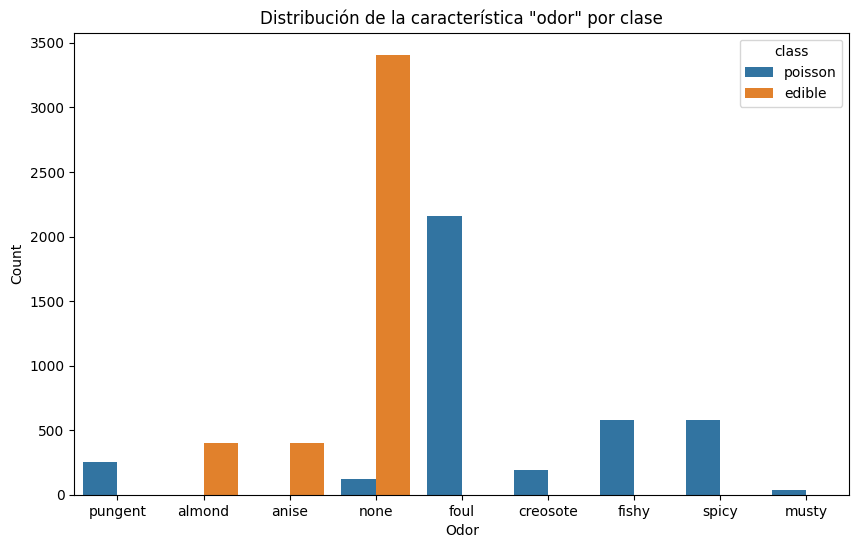

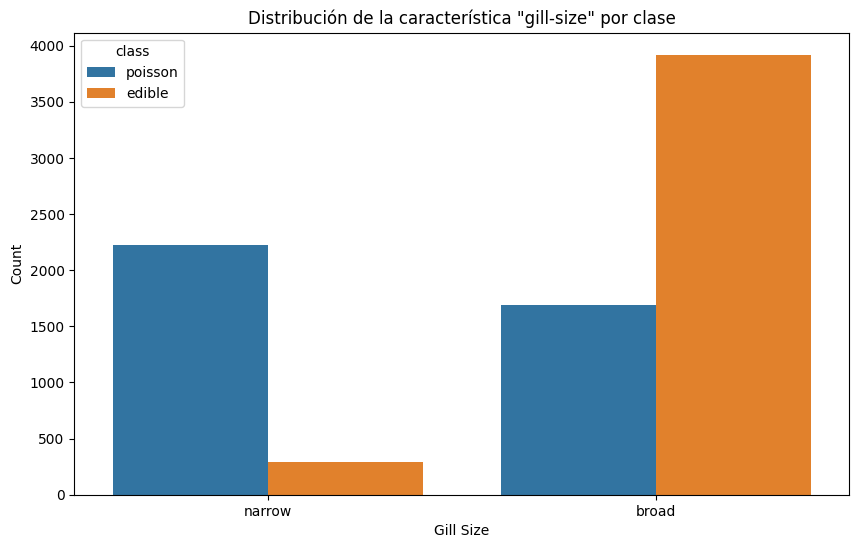

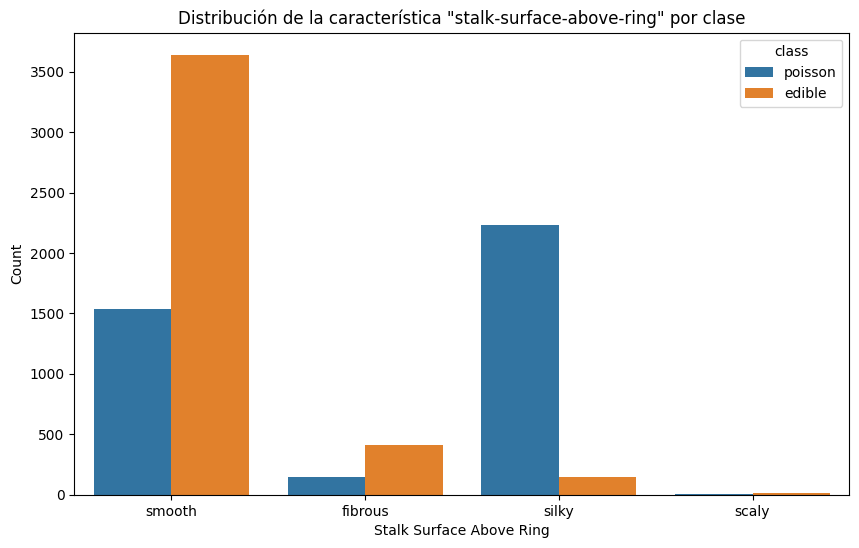

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exploración de la característica 'odor'
plt.figure(figsize=(10, 6))
sns.countplot(x='odor', hue='class', data=mushroom_data)
plt.title('Distribución de la característica "odor" por clase')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

# Exploración de la característica 'gill-size'
plt.figure(figsize=(10, 6))
sns.countplot(x='gill-size', hue='class', data=mushroom_data)
plt.title('Distribución de la característica "gill-size" por clase')
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.show()

# Exploración de la característica 'stalk-surface-above-ring'
plt.figure(figsize=(10, 6))
sns.countplot(x='stalk-surface-above-ring', hue='class', data=mushroom_data)
plt.title('Distribución de la característica "stalk-surface-above-ring" por clase')
plt.xlabel('Stalk Surface Above Ring')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Definir el modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Realizar validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_clf, X_pca, y, cv=skf)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Promedio de validación cruzada: {scores.mean():.4f}")
print(f"Desviación estándar de validación cruzada: {scores.std():.4f}")


Scores de validación cruzada: [1.         0.99938462 1.         0.99876923 0.99938424]
Promedio de validación cruzada: 0.9995
Desviación estándar de validación cruzada: 0.0005


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import GaussianNB

# Implementar K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exactitud de K-Nearest Neighbors: {accuracy_knn:.4f}")
print("Reporte de clasificación de K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de confusión de K-Nearest Neighbors:")
print(confusion_matrix(y_test, y_pred_knn))

# Implementar Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_pca, y_train)
y_pred_gb = gb_clf.predict(X_test_pca)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Exactitud de Gradient Boosting: {accuracy_gb:.4f}")
print("Reporte de clasificación de Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("Matriz de confusión de Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

# Implementar Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train_pca, y_train)
y_pred_nb = nb_clf.predict(X_test_pca)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Exactitud de Naive Bayes: {accuracy_nb:.4f}")
print("Reporte de clasificación de Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Matriz de confusión de Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))

# Validación cruzada estratificada para los nuevos algoritmos

# K-Nearest Neighbors
scores_knn = cross_val_score(knn, X_pca, y, cv=skf)
print(f"Scores de validación cruzada de KNN: {scores_knn}")
print(f"Promedio de validación cruzada de KNN: {scores_knn.mean():.4f}")
print(f"Desviación estándar de validación cruzada de KNN: {scores_knn.std():.4f}")

# Gradient Boosting
scores_gb = cross_val_score(gb_clf, X_pca, y, cv=skf)
print(f"Scores de validación cruzada de Gradient Boosting: {scores_gb}")
print(f"Promedio de validación cruzada de Gradient Boosting: {scores_gb.mean():.4f}")
print(f"Desviación estándar de validación cruzada de Gradient Boosting: {scores_gb.std():.4f}")

# Naive Bayes
scores_nb = cross_val_score(nb_clf, X_pca, y, cv=skf)
print(f"Scores de validación cruzada de Naive Bayes: {scores_nb}")
print(f"Promedio de validación cruzada de Naive Bayes: {scores_nb.mean():.4f}")
print(f"Desviación estándar de validación cruzada de Naive Bayes: {scores_nb.std():.4f}")


Exactitud de K-Nearest Neighbors: 1.0000
Reporte de clasificación de K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de K-Nearest Neighbors:
[[843   0]
 [  0 782]]
Exactitud de Gradient Boosting: 0.9994
Reporte de clasificación de Gradient Boosting:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de Gradient Boosting:
[[843   0]
 [  1 781]]
Exactitud de Naive Bayes: 0.9545
Repor

NameError: name 'skf' is not defined

In [ ]:
#@title Your Title Here
# Separar las características (X) y la variable objetivo (y)
X = mushroom_data_encoded.drop('class_poisonous', axis=1)
y = mushroom_data_encoded['class_poisonous']

# Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separar una porción del conjunto de prueba para un test adicional (50/50)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Aplicar PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test1_pca = pca.transform(X_test1_scaled)
X_test2_pca = pca.transform(X_test2_scaled)

# Verificar la nueva forma de los datos después de PCA
print(f"Forma original de X: {X.shape}")
print(f"Forma de X después de PCA: {X_train_pca.shape}")

# Verificar la distribución de clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())

print("Distribución de clases en el primer conjunto de prueba:")
print(y_test1.value_counts())

print("Distribución de clases en el segundo conjunto de prueba adicional:")
print(y_test2.value_counts())

# Revisar las correlaciones entre las características y la variable objetivo
corr_matrix = mushroom_data_encoded.corr()
print(corr_matrix['class_poisonous'].sort_values(ascending=False))

# Entrenar y evaluar el modelo en el primer conjunto de prueba
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_test1 = knn.predict(X_test1_pca)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)
print(f"Exactitud de KNN en el primer conjunto de prueba: {accuracy_test1:.4f}")
print("Reporte de clasificación de KNN en el primer conjunto de prueba:")
print(classification_report(y_test1, y_pred_test1))
print("Matriz de confusión de KNN en el primer conjunto de prueba:")
print(confusion_matrix(y_test1, y_pred_test1))

# Evaluar el modelo en el segundo conjunto de prueba adicional
y_pred_test2 = knn.predict(X_test2_pca)
accuracy_test2 = accuracy_score(y_test2, y_pred_test2)
print(f"Exactitud de KNN en el segundo conjunto de prueba adicional: {accuracy_test2:.4f}")
print("Reporte de clasificación de KNN en el segundo conjunto de prueba adicional:")
print(classification_report(y_test2, y_pred_test2))
print("Matriz de confusión de KNN en el segundo conjunto de prueba adicional:")
print(confusion_matrix(y_test2, y_pred_test2))

Forma original de X: (8124, 86)
Forma de X después de PCA: (6499, 50)
Distribución de clases en el conjunto de entrenamiento:
class_poisonous
False    3365
True     3134
Name: count, dtype: int64
Distribución de clases en el primer conjunto de prueba:
class_poisonous
False    413
True     399
Name: count, dtype: int64
Distribución de clases en el segundo conjunto de prueba adicional:
class_poisonous
False    430
True     383
Name: count, dtype: int64
class_poisonous                    1.000000
odor_foul                          0.623842
stalk-surface-above-ring_silky     0.587658
stalk-surface-below-ring_silky     0.573524
gill-size_narrow                   0.540024
                                     ...   
spore-print-color_brown           -0.416645
stalk-surface-below-ring_smooth   -0.425444
stalk-surface-above-ring_smooth   -0.491314
ring-type_pendant                 -0.540469
odor_none                         -0.785557
Name: class_poisonous, Length: 87, dtype: float64
Exactitud d